## DRAGON REAL ESTATE PRICE-PREDICTOR



In [1]:
import pandas as pd


In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,1.00632,2.00632,3.00632,4.00632,5.00632,6.00632,7.00632,8.00632,9.00632,10.00632,11.00632,12.00632,13.00632
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       504 non-null    float64
 2   INDUS    504 non-null    float64
 3   CHAS     504 non-null    float64
 4   NOX      504 non-null    float64
 5   RM       504 non-null    float64
 6   AGE      504 non-null    float64
 7   DIS      504 non-null    float64
 8   RAD      504 non-null    float64
 9   TAX      504 non-null    float64
 10  PTRATIO  504 non-null    float64
 11  B        504 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     504 non-null    float64
dtypes: float64(14)
memory usage: 55.2 KB


In [5]:
housing['CHAS'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3.00632
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
499    0.00000
500    0.00000
501    0.00000
502    0.00000
503    0.00000
Name: CHAS, Length: 504, dtype: float64>

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.623418,11.375013,11.148068,0.075409,0.561643,6.282820,68.389893,3.800011,9.585330,408.069457,18.434933,356.083405,12.634794,22.535330
std,8.617172,23.360473,6.872160,0.286099,0.192656,0.705894,28.320150,2.114658,8.709392,169.613521,2.191253,92.567337,7.115300,9.214604
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,9.006320,10.006320,0.320000,1.730000,5.000000
25%,0.081960,0.000000,5.175000,0.000000,0.449000,5.883000,44.225000,2.097050,4.000000,279.000000,17.375000,375.300000,6.990000,16.950000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.190950,5.000000,330.000000,19.000000,391.385000,11.360000,21.200000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.626000,94.100000,5.214600,24.000000,666.000000,20.200000,396.215000,16.945000,25.000000
max,88.976200,100.000000,27.740000,3.006320,4.006320,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20, 15))

## TRAINING AND TESTING

In [9]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)
print({len(test_set)})
print({len(train_set)})

{101}
{403}


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
stratify=housing['CHAS']


In [13]:
housing['CHAS']

0      3.00632
1      0.00000
2      0.00000
3      0.00000
4      0.00000
        ...   
499    0.00000
500    0.00000
501    0.00000
502    0.00000
503    0.00000
Name: CHAS, Length: 504, dtype: float64

In [14]:
housing=train_set.copy()

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.682452
B          0.343378
ZN         0.337554
DIS        0.224804
CHAS       0.183256
AGE       -0.358745
RAD       -0.378943
CRIM      -0.387779
NOX       -0.414135
TAX       -0.457022
INDUS     -0.457975
PTRATIO   -0.491144
LSTAT     -0.743446
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

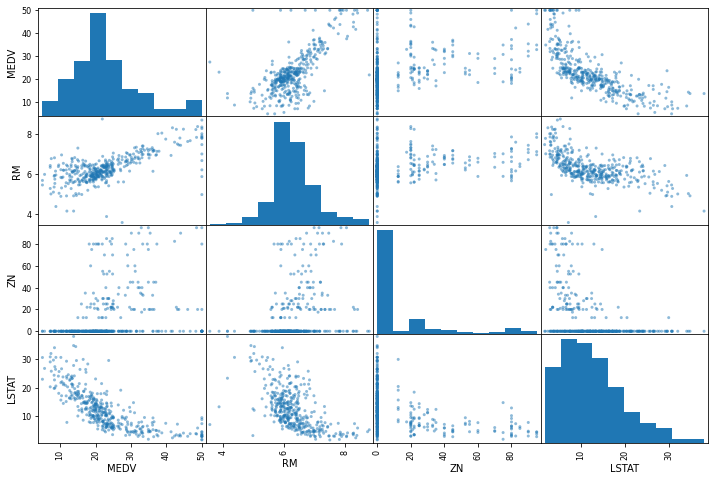

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize =(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

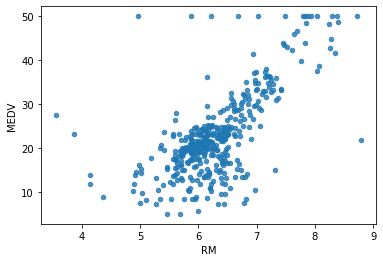

In [18]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## ATTRIBUTE COMBINATIONS

In [19]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
75,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27,20.8,64.820847
442,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8,113.768364
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9,52.622557
325,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2,47.180667
388,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1,116.576230


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

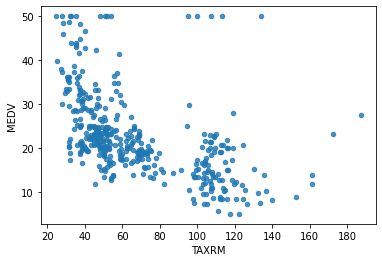

In [21]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.682452
B          0.343378
ZN         0.337554
DIS        0.224804
CHAS       0.183256
AGE       -0.358745
RAD       -0.378943
CRIM      -0.387779
NOX       -0.414135
TAX       -0.457022
INDUS     -0.457975
PTRATIO   -0.491144
TAXRM     -0.525788
LSTAT     -0.743446
Name: MEDV, dtype: float64

In [23]:
housing = train_set.drop("MEDV", axis=1)
housing_labels = train_set["MEDV"].copy()

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([2.6169e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.3800e-01,
       6.1950e+00, 7.6700e+01, 3.0992e+00, 5.0000e+00, 3.3500e+02,
       1.8800e+01, 3.9145e+02, 1.1340e+01])

## CREATING PIPELINE

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy="median")),
    ('std_scaler' , StandardScaler()),
])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [28]:
housing_num_tr.shape

(403, 13)

## MODEL SELECTION

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)

In [33]:
model.predict(prepared_data)

array([21.176, 10.695, 20.055, 21.699, 14.579])

In [34]:
list(some_labels)

[20.8, 10.8, 19.9, 22.2, 15.1]

##MODEL EVALUATION

In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [36]:
lin_mse

1.8620471513647667

## CROSS VALIDATION

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

In [38]:
rmse_scores

array([3.38014377, 3.17291818, 3.51800468, 3.30876496, 5.48563498,
       4.39481776, 2.27054954, 2.57987867, 2.87233922, 2.87948087])

In [39]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ",scores.std())

In [40]:
print_scores(rmse_scores)

Scores: [3.38014377 3.17291818 3.51800468 3.30876496 5.48563498 4.39481776
 2.27054954 2.57987867 2.87233922 2.87948087]
Mean:  3.3862532631445434
Standard deviation:  0.8893524983484014


In [41]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## TESTING


In [44]:
X_test = test_set.drop("MEDV", axis=1)
Y_test = test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[28.369 35.189 16.99  24.394 29.264 20.638 12.952 14.59  20.817 20.953
 29.962 18.774 27.993 28.459 23.422 24.703 16.356  6.961 32.664 14.898
 43.124 47.305 19.585 25.431 19.928 14.971 25.778 23.453 20.955 20.876
 21.749 14.965 11.642 21.964 14.227 17.698 34.854 19.676 19.882 22.712
 19.613 20.778 22.378 23.694 23.192 25.236 21.109 23.283 18.206 22.763
 21.074 45.613 14.281 20.128 20.354 21.831 14.62  28.711 20.007 20.885
 24.938 30.455 33.863 18.965 12.253 19.683 14.978 22.028 30.888 14.759
 18.892  8.243 20.541 14.911 20.949 11.162 17.778 22.076 12.02  13.801
 22.039 15.228 44.5   14.816 21.156 26.836 14.257 24.379 28.121 15.325
 28.585 20.679 17.708 30.888 19.216 15.012 22.82  12.154 27.146 27.061
 31.197] [29.4, 33.2, 13.6, 24.1, 28.2, 21.2, 12.0, 13.4, 19.6, 16.8, 26.7, 18.9, 23.7, 28.0, 25.0, 23.8, 15.7, 10.5, 30.3, 13.0, 35.2, 45.4, 14.5, 22.4, 20.8, 14.9, 23.9, 23.8, 22.4, 18.3, 22.6, 14.1, 13.9, 25.0, 19.1, 15.6, 34.7, 18.5, 21.7, 21.4, 19.7, 17.8, 24.4, 24.2, 22.9, 22.0, 18.9

In [43]:
final_rmse

3.0874221209120427

In [46]:
prepared_data[0]

array([-0.40441713, -0.5118271 ,  0.25276079, -0.25164367, -1.0119758 ,
       -0.21823341, -0.79173772,  0.11953911, -0.52794025, -0.06545983,
        0.16091802,  0.33387519, -0.31464096])